In [1]:

from fastai07.structured import *
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
import pandas as pd

we will be using old version of fastai (0.7.0)

# Looking at data

In [28]:
df = pd.read_csv('housing_train.csv')
df.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

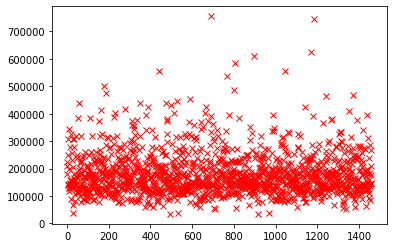

In [30]:
plt.plot(df.SalePrice, 'rx')

# Preprocessing

In [31]:
train, y, nas = proc_df(df) 
train.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
SaleCondition,5,5,5,1,5
SalePrice,208500,181500,223500,140000,250000
LotFrontage_na,False,False,False,False,False
MasVnrArea_na,False,False,False,False,False


In [32]:
def normalize(x): 
    
    out = (x - x.mean())/x.std()
    return out, x.mean(), x.std()

def normalize_all(X): 
    
    for i in range(X.shape[1]): 
        if X.iloc[:,i].dtype != 'O' :
            temp = X.iloc[:,i]
            temp = normalize(temp)[0]
            X.iloc[:,i] = temp
    return X 


In [33]:
train = train.drop('Id', axis = 1)


In [34]:
temp = np.log(train.SalePrice)


In [35]:
train = normalize_all(train)
train.shape

(1460, 83)

In [36]:
train.SalePrice = temp
train = train.iloc[:,:80]
train.shape

(1460, 80)

In [37]:
X, y =np.array(train.drop('SalePrice',
                           axis = 1)),np.array(train.SalePrice)

X_train, y_train = X[:1200,:], y[:1200]
X_val, y_val = X[1200:,:], y[1200:]

In [38]:
X_train, y_train

(array([[ 0.07335, -0.04552, -0.2208 , ...,  0.13873,  0.31376,  0.20843],
        [-0.87226, -0.04552,  0.46016, ..., -0.61423,  0.31376,  0.20843],
        [ 0.07335, -0.04552, -0.08461, ...,  0.13873,  0.31376,  0.20843],
        ...,
        [ 0.42795,  1.53672, -0.2208 , ..., -1.36719, -1.61911,  0.20843],
        [-0.87226, -0.04552,  0.00619, ...,  0.89169,  0.31376,  0.20843],
        [-0.87226, -0.04552,  0.23317, ..., -1.36719,  0.31376,  0.20843]]),
 array([12.24769, 12.10901, 12.31717, ..., 11.87757, 12.08954, 11.90497]))

In [39]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(1,  activation = 'linear')])

In [40]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [41]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [54]:
history = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = 1000)

Train on 1200 samples, validate on 260 samples
Epoch 1/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.4779 - mean_squared_error: 0.4779 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 2/1000
1200/1200 [==============================] - 0s 119us/sample - loss: 0.4704 - mean_squared_error: 0.4704 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 3/1000
1200/1200 [==============================] - 0s 80us/sample - loss: 0.4435 - mean_squared_error: 0.4435 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4/1000
1200/1200 [==============================] - 0s 80us/sample - loss: 0.4699 - mean_squared_error: 0.4699 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 5/1000
1200/1200 [==============================] - 0s 84us/sample - loss: 0.4192 - mean_squared_error: 0.4192 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 6/1000
1200/1200 [==============================] - 0s 82us/sample - loss: 0.4263 - mean_squared_erro

Epoch 49/1000
1200/1200 [==============================] - 0s 84us/sample - loss: 0.3391 - mean_squared_error: 0.3391 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 50/1000
1200/1200 [==============================] - 0s 77us/sample - loss: 0.3039 - mean_squared_error: 0.3039 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 51/1000
1200/1200 [==============================] - 0s 77us/sample - loss: 0.3177 - mean_squared_error: 0.3177 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 52/1000
1200/1200 [==============================] - 0s 80us/sample - loss: 0.3258 - mean_squared_error: 0.3258 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 53/1000
1200/1200 [==============================] - 0s 96us/sample - loss: 0.3023 - mean_squared_error: 0.3023 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 54/1000
1200/1200 [==============================] - 0s 82us/sample - loss: 0.3005 - mean_squared_error: 0.3005 - val_loss: 0.0359 - val_mean_sq

1200/1200 [==============================] - 0s 78us/sample - loss: 0.2232 - mean_squared_error: 0.2232 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 98/1000
1200/1200 [==============================] - 0s 78us/sample - loss: 0.2131 - mean_squared_error: 0.2131 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 99/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.2313 - mean_squared_error: 0.2313 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 100/1000
1200/1200 [==============================] - 0s 80us/sample - loss: 0.2290 - mean_squared_error: 0.2290 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 101/1000
1200/1200 [==============================] - 0s 82us/sample - loss: 0.2140 - mean_squared_error: 0.2140 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 102/1000
1200/1200 [==============================] - 0s 78us/sample - loss: 0.2088 - mean_squared_error: 0.2088 - val_loss: 0.0451 - val_mean_squared_error

1200/1200 [==============================] - 0s 86us/sample - loss: 0.1456 - mean_squared_error: 0.1456 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 146/1000
1200/1200 [==============================] - 0s 78us/sample - loss: 0.1532 - mean_squared_error: 0.1532 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 147/1000
1200/1200 [==============================] - 0s 88us/sample - loss: 0.1323 - mean_squared_error: 0.1323 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 148/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.1473 - mean_squared_error: 0.1473 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 149/1000
1200/1200 [==============================] - 0s 89us/sample - loss: 0.1405 - mean_squared_error: 0.1405 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 150/1000
1200/1200 [==============================] - 0s 81us/sample - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.0545 - val_mean_squared_err

Epoch 193/1000
1200/1200 [==============================] - 0s 119us/sample - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 194/1000
1200/1200 [==============================] - 0s 104us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 195/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 196/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 197/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 198/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0457 - val

Epoch 241/1000
1200/1200 [==============================] - 0s 115us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 242/1000
1200/1200 [==============================] - 0s 102us/sample - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 243/1000
1200/1200 [==============================] - 0s 102us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 244/1000
1200/1200 [==============================] - 0s 107us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 245/1000
1200/1200 [==============================] - 0s 97us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 246/1000
1200/1200 [==============================] - 0s 107us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0377 - 

Epoch 289/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 290/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 291/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 292/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 293/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 294/1000
1200/1200 [==============================] - 0s 108us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0397 - val_

Epoch 337/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 338/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 339/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 340/1000
1200/1200 [==============================] - 0s 90us/sample - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 341/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 342/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0447 - val_m

Epoch 385/1000
1200/1200 [==============================] - 0s 100us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 386/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 387/1000
1200/1200 [==============================] - 0s 97us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 388/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 389/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 390/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0565 - val_

Epoch 433/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 434/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 435/1000
1200/1200 [==============================] - 0s 90us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 436/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 437/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 438/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0449 - val_m

Epoch 481/1000
1200/1200 [==============================] - 0s 90us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 482/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 483/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 484/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 485/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 486/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0487 - val_m

Epoch 529/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 530/1000
1200/1200 [==============================] - 0s 96us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 531/1000
1200/1200 [==============================] - 0s 102us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 532/1000
1200/1200 [==============================] - 0s 93us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 533/1000
1200/1200 [==============================] - 0s 97us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 534/1000
1200/1200 [==============================] - 0s 97us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0443 - val_

Epoch 577/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 578/1000
1200/1200 [==============================] - 0s 96us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 579/1000
1200/1200 [==============================] - 0s 114us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 580/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 581/1000
1200/1200 [==============================] - 0s 96us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 582/1000
1200/1200 [==============================] - 0s 95us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0532 - val_

Epoch 625/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 626/1000
1200/1200 [==============================] - 0s 104us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 627/1000
1200/1200 [==============================] - 0s 104us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 628/1000
1200/1200 [==============================] - 0s 112us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 629/1000
1200/1200 [==============================] - 0s 98us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 630/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0501 - va

Epoch 673/1000
1200/1200 [==============================] - 0s 140us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 674/1000
1200/1200 [==============================] - 0s 106us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 675/1000
1200/1200 [==============================] - 0s 100us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 676/1000
1200/1200 [==============================] - 0s 100us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 677/1000
1200/1200 [==============================] - 0s 103us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 678/1000
1200/1200 [==============================] - 0s 105us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0454 -

Epoch 721/1000
1200/1200 [==============================] - 0s 87us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 722/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 723/1000
1200/1200 [==============================] - 0s 82us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 724/1000
1200/1200 [==============================] - 0s 103us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 725/1000
1200/1200 [==============================] - 0s 81us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 726/1000
1200/1200 [==============================] - 0s 98us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0500 - val_

Epoch 769/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 770/1000
1200/1200 [==============================] - 0s 82us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 771/1000
1200/1200 [==============================] - 0s 86us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 772/1000
1200/1200 [==============================] - 0s 80us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 773/1000
1200/1200 [==============================] - 0s 81us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 774/1000
1200/1200 [==============================] - 0s 84us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0521 - val_m

Epoch 817/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 818/1000
1200/1200 [==============================] - 0s 83us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 819/1000
1200/1200 [==============================] - 0s 81us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 820/1000
1200/1200 [==============================] - 0s 83us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 821/1000
1200/1200 [==============================] - 0s 82us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 822/1000
1200/1200 [==============================] - 0s 80us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0524 - val_m

Epoch 865/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 866/1000
1200/1200 [==============================] - 0s 108us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0608 - val_mean_squared_error: 0.0608
Epoch 867/1000
1200/1200 [==============================] - 0s 91us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 868/1000
1200/1200 [==============================] - 0s 113us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 869/1000
1200/1200 [==============================] - 0s 98us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 870/1000
1200/1200 [==============================] - 0s 92us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0463 - val

Epoch 913/1000
1200/1200 [==============================] - 0s 88us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 914/1000
1200/1200 [==============================] - 0s 89us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 915/1000
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 916/1000
1200/1200 [==============================] - 0s 87us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 917/1000
1200/1200 [==============================] - 0s 89us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 918/1000
1200/1200 [==============================] - 0s 88us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0488 - val_m

Epoch 961/1000
1200/1200 [==============================] - 0s 86us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 962/1000
1200/1200 [==============================] - 0s 82us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 963/1000
1200/1200 [==============================] - 0s 101us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 964/1000
1200/1200 [==============================] - 0s 97us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 965/1000
1200/1200 [==============================] - 0s 87us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 966/1000
1200/1200 [==============================] - 0s 77us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0413 - val_

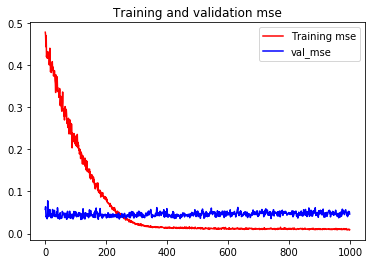

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training mse')
plt.plot(epochs, val_acc, 'b', label='val_mse')
plt.title('Training and validation mse')
plt.legend(loc=0)
plt.figure()


plt.show()

In [56]:
test = pd.read_csv('test.csv')
test2 = test.drop('Id', axis = 1)
test2, _, _ = proc_df(test2)
test2 = normalize_all(test2)
test2 = test2.iloc[:,:79]


In [57]:
test2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.874411,-1.419439,0.567135,0.363804,0.064238,-0.263996,0.742366,0.318591,0.037037,0.572249,...,1.818336,-0.057207,-0.042776,2.468449,-0.187278,-0.092212,-0.038268,1.713318,0.325443,0.201314
1,-0.874411,-0.022029,0.615752,0.897553,0.064238,-0.263996,-1.384162,0.318591,0.037037,-1.950142,...,-0.301440,-0.057207,-0.042776,-0.465935,1.697129,19.723675,-0.038268,1.713318,0.325443,0.201314
2,0.061330,-0.022029,0.275437,0.809368,0.064238,-0.263996,-1.384162,0.318591,0.037037,0.572249,...,-0.301440,-0.057207,-0.042776,2.468449,-0.187278,-0.092212,-1.140224,1.713318,0.325443,0.201314
3,0.061330,-0.022029,0.469903,0.032053,0.064238,-0.263996,-1.384162,0.318591,0.037037,0.572249,...,-0.301440,-0.057207,-0.042776,-0.465935,-0.187278,-0.092212,-0.038268,1.713318,0.325443,0.201314
4,1.464941,-0.022029,-1.231670,-0.971475,0.064238,-0.263996,-1.384162,-2.533092,0.037037,0.572249,...,2.242291,-0.057207,-0.042776,-0.465935,-0.187278,-0.092212,-1.874861,1.713318,0.325443,0.201314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.400682,1.375381,-2.301230,-1.590785,0.064238,-0.263996,0.742366,0.318591,0.037037,0.572249,...,-0.301440,-0.057207,-0.042776,-0.465935,-0.187278,-0.092212,-0.038268,-1.359492,0.325443,0.201314
1455,2.400682,1.375381,-2.301230,-1.599260,0.064238,-0.263996,0.742366,0.318591,0.037037,0.572249,...,-0.301440,-0.057207,-0.042776,-0.465935,-0.187278,-0.092212,-0.772905,-1.359492,0.325443,-3.588588
1456,-0.874411,-0.022029,4.456443,2.054445,0.064238,-0.263996,0.742366,0.318591,0.037037,0.572249,...,-0.301440,-0.057207,-0.042776,-0.465935,-0.187278,-0.092212,1.063688,-1.359492,0.325443,-3.588588
1457,0.646168,-0.022029,-0.307959,0.125484,0.064238,-0.263996,0.742366,0.318591,0.037037,0.572249,...,-0.301440,-0.057207,-0.042776,2.468449,5.465945,1.017478,0.329051,-1.359492,0.325443,0.201314


In [58]:
out = model.predict(test2)


In [59]:
out = np.exp(out.flatten())

In [60]:
out.shape

(1459,)

In [61]:
Id = np.array(test.Id)
Result = pd.DataFrame({'Id' : Id, 'SalePrice' : out})

Result.to_csv('Housing_Prices_Kaggle_deep', index = False)